In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('BigTests.pickle', 'rb')
data = pickle.load(f)

In [4]:
print(data['var'])
print(data['order'])

{'globalRecluster': ['false', 'true'], 'clusteringOn': ['false', 'true'], 'bluetoothLossPercentage': [0, 1e-06, 2e-06, 5e-06, 2e-05], 'reclusterThreshold': [0.025, 0.05, 0.1, 0.15, 0.2, 0.4], 'clusterMinThresh': [0, 2], 'localRecluster': [0, 1, 2, 3], 'totalNodes': [500, 1000, 2000, 3500], 'reclusterPeriod': [5, 30, 90], 'wifiLossPercentage': [2e-05, 5e-05]}
['globalRecluster', 'localRecluster', 'reclusterPeriod', 'wifiLossPercentage', 'totalNodes', 'clusteringOn', 'clusterMinThresh', 'bluetoothLossPercentage', 'reclusterThreshold']


In [5]:
i = 0
for key in data['data'].keys():
    i += len(data['data'][key])
print(i)

24352


In [7]:
def compareLocalClusteringAndTotalNodes():
    stats = {}
    for key in data['data'].keys():
        for run in data['data'][key]:
            statsKey = '%d-%d' % (key[4], key[1])
            if statsKey in stats.keys():
                stats[statsKey]['Percent'] += run['Percent Nodes Dead']
                stats[statsKey]['Average'] += run['Average Remaining Battery']
                stats[statsKey]['Runs'] += 1
            else:
                stats[statsKey] = {}
                stats[statsKey]['Percent'] = run['Percent Nodes Dead']
                stats[statsKey]['Average'] = run['Average Remaining Battery']
                stats[statsKey]['Runs'] = 1
    for key in stats.keys():
        stats[key]['Percent'] = stats[key]['Percent']/stats[key]['Runs']
        stats[key]['Average'] = stats[key]['Average']/stats[key]['Runs']
    return stats

#print(compareLocalClusteringAndTotalNodes())

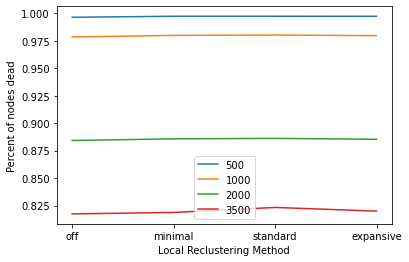

In [8]:
stats = compareLocalClusteringAndTotalNodes()
x = ['off', 'minimal', 'standard', 'expansive']
for nodeCount in data['var']['totalNodes']:
    y = []
    for i in data['var']['localRecluster']:
        y += [stats['%d-%d' % (nodeCount, i)]['Percent']]
    plt.plot(x, y, label='%d' % nodeCount)
plt.xlabel('Local Reclustering Method')
plt.ylabel('Percent of nodes dead')
plt.legend()
plt.show()

In [1]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            if key[ind] == ignoreDict[ind]:
                ignore = True
        if not ignore:
            for run in data['data'][key]:
                keyStrs = []
                for ind in keyInds:
                    keyStrs += [str(key[ind])]
                statsKey = '-'.join(keyStrs)
                arr = run[compare]
                minArrLen = min(minArrLen, len(arr))
                if statsKey in stats.keys():
                    for i in range(minArrLen):
                        stats[statsKey][i] += arr[i]
                    counts[statsKey] += 1
                else:
                    stats[statsKey] = []
                    for i in range(minArrLen):
                        stats[statsKey] += [arr[i]]
                    counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [2]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)])
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend()
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        plt.legend(title=legendTitle)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [])

In [6]:
batteriesOverTimeLocalReclustering = compareBatteriesOverTime([4,1])

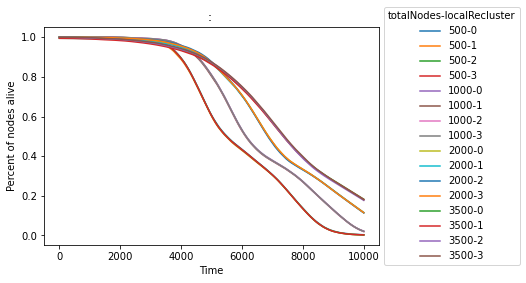

In [9]:
generateBatteriesOverTimeGraphs(batteriesOverTimeLocalReclustering, 0)

In [6]:
batteriesOverTimeGlobalReclustering = compareOverTime('Percent Alive Over Time', [0])

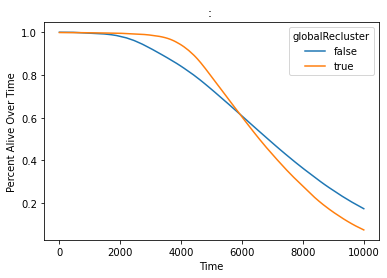

In [7]:
generateOverTimeGraphs(batteriesOverTimeGlobalReclustering, 0)

In [6]:
batteriesOverTimeGlobalTotal = compareBatteriesOverTime([4, 0], {5: 'false'})

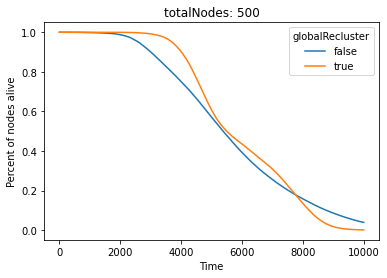

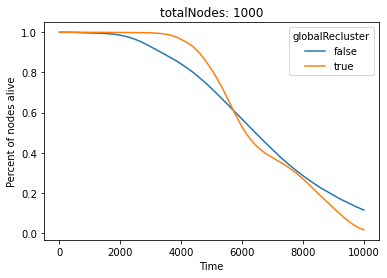

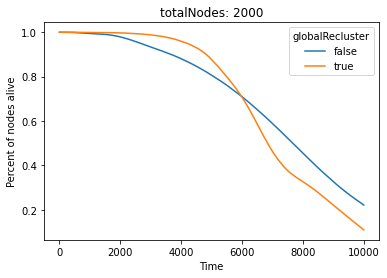

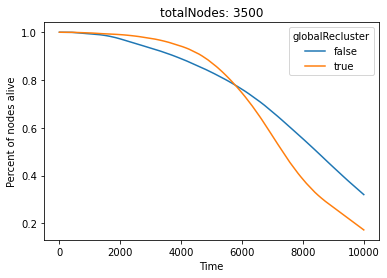

In [7]:
generateBatteriesOverTimeGraphs(batteriesOverTimeGlobalTotal, 1)

In [25]:
batteriesOverTime_GlobalTotalThreshold = compareBatteriesOverTime([4, 0, 8], {5: 'false', 2: 5})

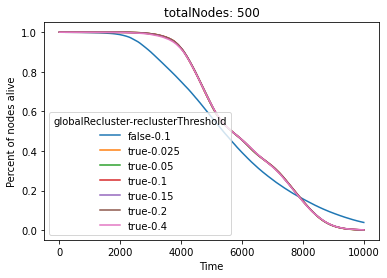

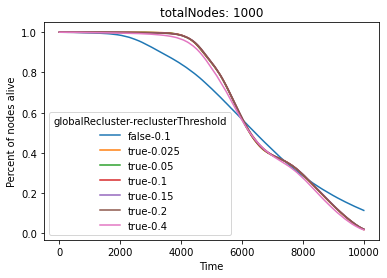

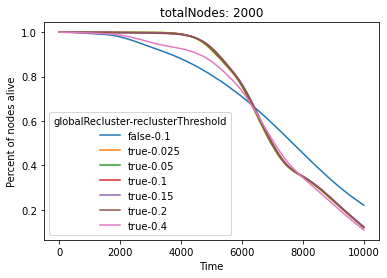

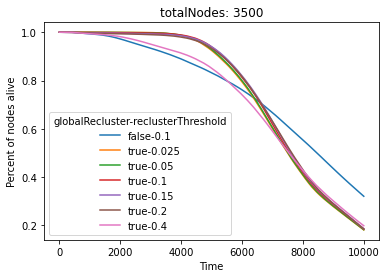

In [26]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThreshold, 1)

In [6]:
batteriesOverTime_GlobalTotalThresholdPeriod = compareBatteriesOverTime([4, 0, 2], {5: 'false'})

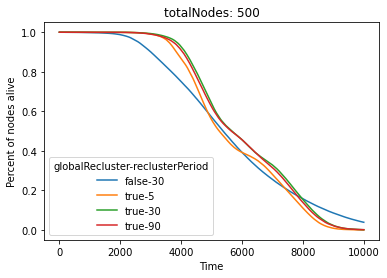

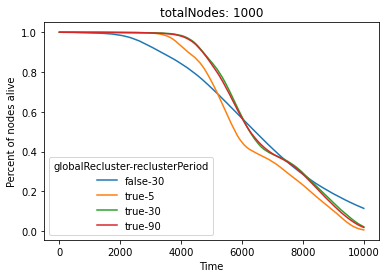

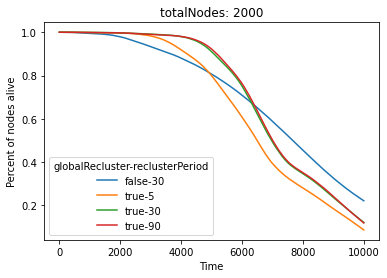

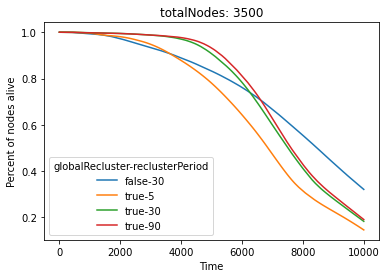

In [24]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThresholdPeriod, 1)

In [45]:
batteriesOverTime_GlobalTotalThresholdPeriodMin = compareBatteriesOverTime([4, 6, 2, 8, 0], {5: 'false'})

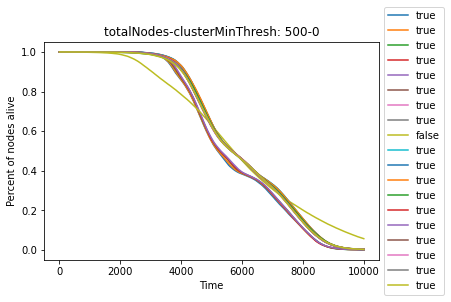

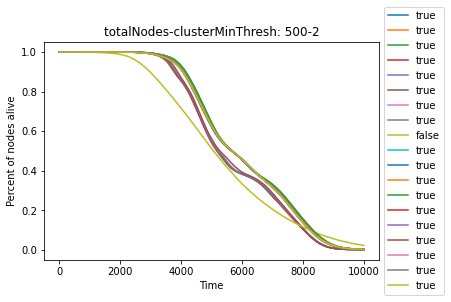

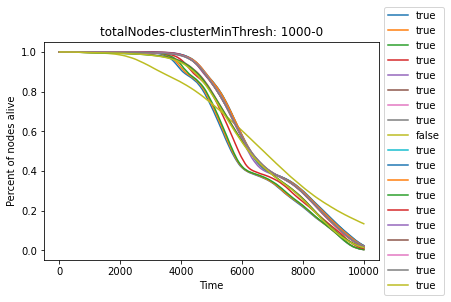

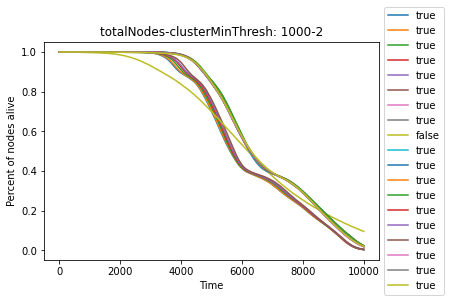

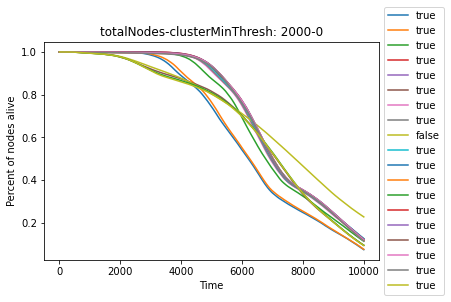

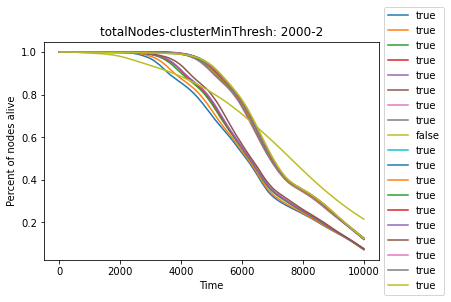

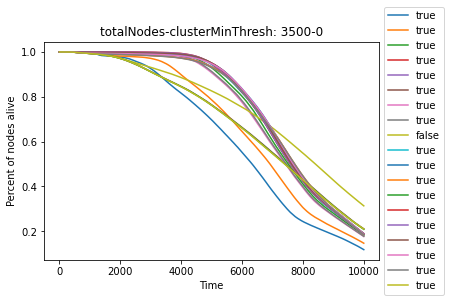

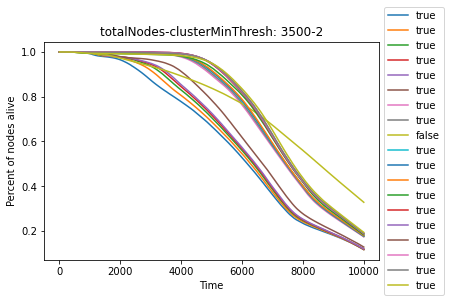

In [46]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThresholdPeriodMin, 2)

In [ ]:
batteriesOverTime_Init = compareBatteriesOverTime([4, 6, 2, 8, 0], {5: 'false'})